# Import de fonctions

In [12]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import sys

# import UCSL github : Unsupervised Clustering driven by Supervised Learning 
!git clone -b sklearn_update https://github.com/rlouiset/py_ucsl > /dev/null 2>&1

sys.path.append('./py_ucsl/')
from ucsl.ucsl_classifier import *
from ucsl.ucsl_regressor import *


# Import data

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


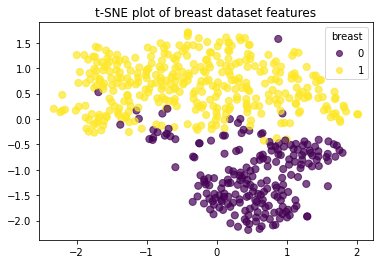

In [13]:
# load breast cancer dataset
breast_cancer = load_breast_cancer()
X_train = breast_cancer.data

# normalize training features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
y_train = breast_cancer.target

# project both on tSNE
tsne = TSNE(n_components=2)
X_train_tsne = tsne.fit_transform(X_train)
X_train_tsne = scaler.fit_transform(X_train_tsne)

# plot t-SNE feature projection
fig, ax = plt.subplots()
labels_map = {0:"Benign", 1: "Malignant"}
labels = [labels_map[y_i] for y_i in y_train]
scatter = ax.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train, s=50, alpha=0.7, label=labels)
ax.legend(*scatter.legend_elements(), title="breast")
plt.title("t-SNE plot of breast dataset features")
plt.show()

# Breast Cancer unsupervised classification

In [14]:
# UCSL training
UCSL_method = UCSL_C(n_clusters=2, label_to_cluster=1,
                    clustering="spherical_gaussian_mixture", maximization="linear")
UCSL_method = UCSL_method.fit(X_train, y_train)

# KMeans training
KMeans_method = KMeans(n_clusters=2)
KMeans_method = KMeans_method.fit(X_train[y_train==1])

# GaussianMixture training
GaussianMixture_method = GaussianMixture(n_components=2)
GaussianMixture_method = GaussianMixture_method.fit(X_train[y_train==1])


-----------------------------------------------------


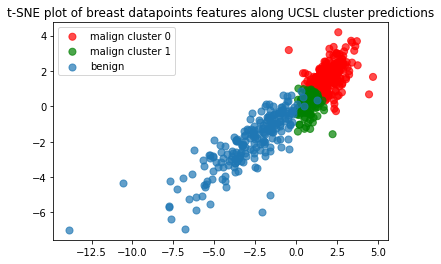

UCSL method :
mean_radius_index statistics of cluster 0 :  -0.738+/-0.443
mean_radius_index statistics of cluster 1 :  -0.164+/-0.394

mean_perimeter_index statistics of cluster 0 :  -0.748+/-0.416
mean_perimeter_index statistics of cluster 1 :  -0.173+/-0.378

mean_area_index statistics of cluster 0 :  -0.680+/-0.316
mean_area_index statistics of cluster 1 :  -0.243+/-0.337

radius_worst_index statistics of cluster 0 :  -0.747+/-0.353
radius_worst_index statistics of cluster 1 :  -0.259+/-0.311

perimeter_worst_index statistics of cluster 0 :  -0.757+/-0.336
perimeter_worst_index statistics of cluster 1 :  -0.255+/-0.303

area_worst_index statistics of cluster 0 :  -0.670+/-0.236
area_worst_index statistics of cluster 1 :  -0.329+/-0.246

-----------------------------------------------------


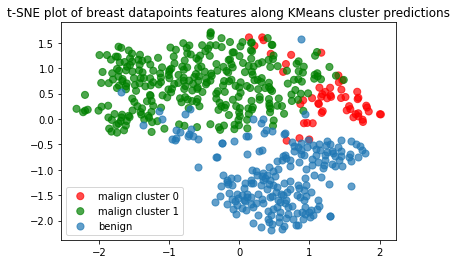

KMeans method :
mean_radius_index statistics of cluster 0 :  -0.776+/-0.554
mean_radius_index statistics of cluster 1 :  -0.525+/-0.486

mean_perimeter_index statistics of cluster 0 :  -0.720+/-0.549
mean_perimeter_index statistics of cluster 1 :  -0.546+/-0.468

mean_area_index statistics of cluster 0 :  -0.704+/-0.397
mean_area_index statistics of cluster 1 :  -0.518+/-0.371

radius_worst_index statistics of cluster 0 :  -0.774+/-0.446
radius_worst_index statistics of cluster 1 :  -0.567+/-0.395

perimeter_worst_index statistics of cluster 0 :  -0.706+/-0.474
perimeter_worst_index statistics of cluster 1 :  -0.585+/-0.385

area_worst_index statistics of cluster 0 :  -0.692+/-0.290
area_worst_index statistics of cluster 1 :  -0.543+/-0.280

-----------------------------------------------------


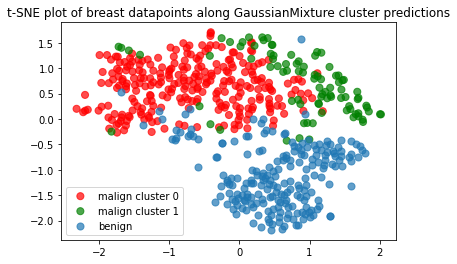

Gaussian Mixture method :
mean_radius_index statistics of cluster 0 :  -0.489+/-0.480
mean_radius_index statistics of cluster 1 :  -0.786+/-0.511

mean_perimeter_index statistics of cluster 0 :  -0.512+/-0.463
mean_perimeter_index statistics of cluster 1 :  -0.753+/-0.506

mean_area_index statistics of cluster 0 :  -0.491+/-0.371
mean_area_index statistics of cluster 1 :  -0.712+/-0.362

radius_worst_index statistics of cluster 0 :  -0.529+/-0.386
radius_worst_index statistics of cluster 1 :  -0.809+/-0.405

perimeter_worst_index statistics of cluster 0 :  -0.548+/-0.377
perimeter_worst_index statistics of cluster 1 :  -0.770+/-0.429

area_worst_index statistics of cluster 0 :  -0.517+/-0.278
area_worst_index statistics of cluster 1 :  -0.713+/-0.262

-----------------------------------------------------


In [15]:
dictionary_of_features_indexes = {
                                  'mean_radius_index':0,
                                  'mean_perimeter_index':2,
                                  'mean_area_index':3,
                                  'radius_worst_index':20,
                                  'perimeter_worst_index':22,
                                  'area_worst_index':23
                                  }

print('-----------------------------------------------------')
# UCSL predictions
y_pred_classif, y_pred = UCSL_method.predict(X_train[y_train==1])
X_train_UCSL = X_train @ UCSL_method.orthonormal_basis[-1].T
fig, ax = plt.subplots()
ax.scatter(X_train_UCSL[y_train==1, 0][y_pred==0], X_train_UCSL[y_train==1, 1][y_pred==0], c=['r']*np.sum(y_pred==0), s=50, alpha=0.7, label="malign cluster 0")
ax.scatter(X_train_UCSL[y_train==1, 0][y_pred==1], X_train_UCSL[y_train==1, 1][y_pred==1], c=['g']*np.sum(y_pred==1), s=50, alpha=0.7, label="malign cluster 1")
ax.scatter(X_train_UCSL[y_train==0, 0], X_train_UCSL[y_train==0, 1], s=50, alpha=0.7, label="benign")
plt.legend()
plt.title("t-SNE plot of breast datapoints features along UCSL cluster predictions")
plt.show()

print('UCSL method :')
for feature_name, features_index in dictionary_of_features_indexes.items() :
  print(feature_name + ' statistics of cluster 0 : ', str(np.mean(X_train[y_train==1][y_pred==0, features_index]))[:6] + '+/-' + str(np.std(X_train[y_train==1][y_pred==0, features_index]))[:5])
  print(feature_name + ' statistics of cluster 1 : ', str(np.mean(X_train[y_train==1][y_pred==1, features_index]))[:6] + '+/-' + str(np.std(X_train[y_train==1][y_pred==1, features_index]))[:5])
  print('')
print('-----------------------------------------------------')

# KMeans predictions
y_pred = KMeans_method.predict(X_train[y_train==1])
fig, ax = plt.subplots()
ax.scatter(X_train_tsne[y_train==1, 0][y_pred==0], X_train_tsne[y_train==1, 1][y_pred==0], c=['r']*np.sum(y_pred==0), s=50, alpha=0.7, label="malign cluster 0")
ax.scatter(X_train_tsne[y_train==1, 0][y_pred==1], X_train_tsne[y_train==1, 1][y_pred==1], c=['g']*np.sum(y_pred==1), s=50, alpha=0.7, label="malign cluster 1")
ax.scatter(X_train_tsne[y_train==0, 0], X_train_tsne[y_train==0, 1], s=50, alpha=0.7, label="benign")
plt.legend()
plt.title("t-SNE plot of breast datapoints features along KMeans cluster predictions")
plt.show()

print('KMeans method :')
for feature_name, features_index in dictionary_of_features_indexes.items() :
  print(feature_name + ' statistics of cluster 0 : ', str(np.mean(X_train[y_train==1][y_pred==0, features_index]))[:6] + '+/-' + str(np.std(X_train[y_train==1][y_pred==0, features_index]))[:5])
  print(feature_name + ' statistics of cluster 1 : ', str(np.mean(X_train[y_train==1][y_pred==1, features_index]))[:6] + '+/-' + str(np.std(X_train[y_train==1][y_pred==1, features_index]))[:5])
  print('')
print('-----------------------------------------------------')

# GaussianMixture predictions
y_pred = GaussianMixture_method.predict(X_train[y_train==1])
fig, ax = plt.subplots()
ax.scatter(X_train_tsne[y_train==1, 0][y_pred==0], X_train_tsne[y_train==1, 1][y_pred==0], c=['r']*np.sum(y_pred==0), s=50, alpha=0.7, label="malign cluster 0")
ax.scatter(X_train_tsne[y_train==1, 0][y_pred==1], X_train_tsne[y_train==1, 1][y_pred==1], c=['g']*np.sum(y_pred==1), s=50, alpha=0.7, label="malign cluster 1")
ax.scatter(X_train_tsne[y_train==0, 0], X_train_tsne[y_train==0, 1], s=50, alpha=0.7, label="benign")
plt.legend()
plt.title("t-SNE plot of breast datapoints along GaussianMixture cluster predictions")
plt.show()

print('Gaussian Mixture method :')
for feature_name, features_index in dictionary_of_features_indexes.items() :
  print(feature_name + ' statistics of cluster 0 : ', str(np.mean(X_train[y_train==1][y_pred==0, features_index]))[:6] + '+/-' + str(np.std(X_train[y_train==1][y_pred==0, features_index]))[:5])
  print(feature_name + ' statistics of cluster 1 : ', str(np.mean(X_train[y_train==1][y_pred==1, features_index]))[:6] + '+/-' + str(np.std(X_train[y_train==1][y_pred==1, features_index]))[:5])
  print('')
print('-----------------------------------------------------')